<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
#from scipy.special import softmax

from tqdm import tqdm

In [6]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [111]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def stablesoftmax(x):
  """Compute the softmax of vector x in a numerically stable way."""
  exps = np.exp(x)
  return exps / np.sum(exps) 
  
def derivSigmoid(x):
  return x * (1 - x)

def crossEntropyLoss(y_true, y_pred):
  loss = y_true[y_true == 1] @ np.log(y_pred[y_true == 1])
  return -loss / len(y_true)

def targetsSearch(data):
  predict = network.feedforward(data).T
  return np.array([np.argmax(x) for x in predict])

In [122]:
class NeuralNetwork:
  def __init__(self, k):
    # weights
    self.k = k

    # loss
    self.loss = list()
    
  def feedforward(self, data):
    h1 = stablesoftmax(self.k @ data)
    #h2 = softmax((self.k[1] @ h1)) 
    return h1#, h2)

  def train(self, data, y_true):
        
        alpha = 0.0001
        epochs = 50
 
        for epoch in tqdm(range(epochs)):
            """ backprop """

            forward = self.feedforward(data)

            # Neuron h1
            h1 = forward
            
            dL_dy = h1 - y_true               # 10,9000
            dL_dk = dL_dy @ data.T           # 10,256 

            """ Weights and bias updating """
            # Neuron h1
            self.k -= alpha * dL_dk

            # Neuron h2
            #self.k[1] -= alpha * dL_dk2

            """ Loss calculation """
            self.loss.append(crossEntropyLoss(y_true.T, h1.T))
            #alpha -= 0.0005/epochs 

In [123]:
kParameters = np.zeros((10,256))#, np.zeros((10,128))]
                       
confMatrixTest = [[0 for x in range(10)] for i in range(10)]
confMatrixValidation = [[0 for x in range(10)] for i in range(10)]
confMatrixTrain = [[0 for x in range(10)] for i in range(10)]

network = NeuralNetwork(kParameters)
network.train(trainInputs, trainTargets)


100%|██████████| 50/50 [00:00<00:00, 57.68it/s]


In [124]:
testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [125]:
testPredictions
network.k

array([[5.58796475e-03, 1.24303312e-02, 2.72136049e-02, ...,
        2.24690204e-02, 9.15586486e-03, 5.68379213e-04],
       [1.30586711e-02, 1.13744350e-01, 2.01135859e-01, ...,
        1.83116763e-01, 1.06430767e-01, 1.30586629e-02],
       [4.11566943e-02, 1.12136553e-01, 2.29900673e-01, ...,
        4.88096892e-01, 4.93371707e-01, 1.93019374e-01],
       ...,
       [1.77941031e-01, 4.74058325e-01, 5.48509019e-01, ...,
        1.28391502e-01, 1.09921074e-01, 3.55096535e-02],
       [6.05864359e-03, 3.36264909e-02, 1.03449113e-01, ...,
        8.18419918e-02, 3.00776876e-02, 3.37236314e-03],
       [5.86574456e-05, 6.84251920e-03, 3.94891261e-02, ...,
        2.56567679e-01, 2.27077775e-01, 7.69409952e-02]])

In [126]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

49.6


[[98, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 85, 1, 2, 0, 0, 3, 0, 8, 0],
 [31, 9, 40, 6, 0, 0, 7, 0, 6, 1],
 [23, 2, 0, 67, 0, 0, 1, 0, 7, 0],
 [18, 38, 0, 0, 13, 0, 2, 0, 1, 28],
 [59, 6, 0, 14, 0, 9, 1, 0, 9, 2],
 [63, 6, 0, 0, 0, 0, 31, 0, 0, 0],
 [16, 32, 1, 8, 0, 0, 0, 25, 0, 18],
 [14, 15, 0, 4, 0, 0, 0, 0, 63, 4],
 [8, 25, 0, 0, 0, 0, 0, 0, 2, 65]]

In [127]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

49.9


[[99, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 80, 1, 6, 0, 0, 1, 0, 11, 0],
 [30, 12, 42, 3, 0, 0, 4, 0, 9, 0],
 [24, 0, 0, 73, 0, 0, 1, 0, 2, 0],
 [23, 35, 0, 0, 13, 0, 6, 0, 1, 22],
 [56, 1, 0, 17, 0, 8, 1, 0, 16, 1],
 [58, 11, 0, 0, 0, 0, 30, 0, 1, 0],
 [19, 34, 1, 8, 0, 0, 0, 20, 0, 18],
 [12, 10, 0, 1, 0, 0, 0, 0, 70, 7],
 [9, 25, 0, 1, 0, 0, 0, 0, 1, 64]]

In [128]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

470.9


[[892, 5, 0, 0, 0, 0, 3, 0, 0, 0],
 [14, 765, 4, 20, 0, 0, 13, 0, 83, 1],
 [296, 91, 394, 18, 0, 0, 55, 0, 43, 3],
 [169, 17, 3, 673, 0, 0, 8, 0, 25, 5],
 [117, 307, 0, 1, 134, 0, 43, 0, 18, 280],
 [541, 19, 1, 158, 0, 82, 8, 0, 85, 6],
 [495, 61, 0, 0, 0, 0, 342, 0, 1, 1],
 [151, 279, 2, 44, 0, 0, 0, 220, 7, 197],
 [116, 127, 1, 41, 0, 0, 4, 0, 566, 45],
 [49, 184, 0, 9, 0, 0, 0, 0, 17, 641]]

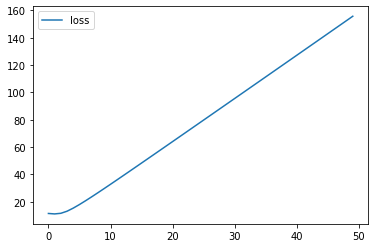

In [129]:
plt.plot(network.loss, label='loss')
plt.legend()